In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt     
import re
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

pwd = os.getcwd()
city = 'boston'
listings = pd.read_csv(pwd + '/' + city +'/listings_2015.csv', encoding = 'utf8')

## 1. Data Loading

In [2]:
listings.describe()

,id,host_since_days,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_count_2016,booked_nights,no_review,review_above_avg,review_above_75,review_above_90,rental_above_avg,rental_above_75,rental_above_90,avg_nights
count,2.394000e+03,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,4.937086e+06,1342.718881,90.853801,85.735589,0.083124,0.996658,0.750209,42.341695,-71.086112,2.879282,...,9.324979,29.028822,0.520050,0.271930,0.248120,0.248120,0.248120,0.248120,0.050125,3.557644
std,2.613953e+06,586.136343,14.553342,19.358405,0.276128,0.057723,0.432982,0.025122,0.031814,1.650655,...,17.253925,52.433011,0.499702,0.445047,0.432012,0.432012,0.432012,0.432012,0.218249,2.397462
min,3.353000e+03,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,42.235942,-71.179069,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2.828520e+06,893.250000,87.000000,76.000000,0.000000,1.000000,1.000000,42.331563,-71.108770,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5.382542e+06,1180.000000,100.000000,95.000000,0.000000,1.000000,1.000000,42.345197,-71.080166,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,7.239868e+06,1683.000000,100.000000,100.000000,0.000000,1.000000,1.000000,42.357978,-71.063298,4.000000,...,11.000000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.689904e+06,3099.000000,100.000000,100.000000,1.000000,1.000000,1.000000,42.397051,-70.987107,14.000000,...,116.000000,348.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [3]:
listings.price = None
listings['avg_nights'] = listings['minimum_nights'].apply(lambda x: x if x > 3.0 else 3.0) 

In [4]:
# add target value candidates for reviews
listings['booked_nights'] = listings['review_count_2016'] * listings['avg_nights']
listings['no_review'] = listings['review_count_2016'].apply(lambda x: 1 if x == 0 else 0)
review_avg_2016 = listings['review_count_2016'].mean()
listings['review_above_avg'] = listings['review_count_2016'].apply(lambda x: 1 if x > review_avg_2016 else 0)
review_75_2016 = np.percentile(listings['review_count_2016'],75)
listings['review_above_75'] = listings['review_count_2016'].apply(lambda x: 1 if x > review_75_2016 else 0)
review_90_2016 = np.percentile(listings['review_count_2016'],90)
listings['review_above_90'] = listings['review_count_2016'].apply(lambda x: 1 if x > review_90_2016 else 0)

In [5]:
# add target value candidates for rentals
rental_avg_2016 = listings['booked_nights'].mean()
listings['rental_above_avg'] = listings['booked_nights'].apply(lambda x: 1 if x > rental_avg_2016 else 0)
rental_75_2016 = np.percentile(listings['booked_nights'],75)
listings['rental_above_75'] = listings['booked_nights'].apply(lambda x: 1 if x > rental_75_2016 else 0)
rental_90_2016 = np.percentile(listings['booked_nights'],90)
listings['rental_above_90'] = listings['booked_nights'].apply(lambda x: 1 if x > rental_90_2016 else 0)
print(rental_75_2016)
print(rental_90_2016)

36.0
99.0


In [6]:
listings["no_review"] = pd.to_numeric(listings["no_review"], downcast='integer')
listings["review_above_avg"] = pd.to_numeric(listings["review_above_avg"], downcast='integer')
listings["review_above_75"] = pd.to_numeric(listings["review_above_75"], downcast='integer')
listings["review_above_90"] = pd.to_numeric(listings["review_above_75"], downcast='integer')
listings["rental_above_avg"] = pd.to_numeric(listings["review_above_75"], downcast='integer')
listings["rental_above_75"] = pd.to_numeric(listings["review_above_75"], downcast='integer')
listings["rental_above_90"] = pd.to_numeric(listings["rental_above_90"], downcast='integer')
listings['available_count_2017'] = None

In [7]:
np.percentile(listings[listings['bedrooms'] == 1]['price_avg_2016'], 50)

120.74244470036935

In [8]:
listings['booked_nights'].describe()

count    2394.000000
mean       29.028822
std        52.433011
min         0.000000
25%         0.000000
50%         0.000000
75%        36.000000
max       348.000000
Name: booked_nights, dtype: float64

In [9]:
listings=listings[listings['booked_nights']<365] # remove outlier
listings['booked_nights'].describe()

count    2394.000000
mean       29.028822
std        52.433011
min         0.000000
25%         0.000000
50%         0.000000
75%        36.000000
max       348.000000
Name: booked_nights, dtype: float64

## 2.Understand Rentals

In [10]:
pivot_rental90 = listings.pivot_table(values='id', \
                index='neighbourhood', columns='rental_above_90',margins=True, aggfunc=len)
pivot_rental75 = listings.pivot_table(values='id', \
                index='neighbourhood', columns='rental_above_75',margins=True, aggfunc=len)
pivot_rental75.iloc[:,1] = pivot_rental75.iloc[:,1]- pivot_rental90.iloc[:,1]
pivot_rental75=pivot_rental75[0:25]
pivot_rental75.index.name = None
pivot_rental75.reset_index()
pivot_rental90=pivot_rental90[0:25]
pivot_rental75.fillna(0)

pivot_pec = pivot_rental90.div(pivot_rental90.iloc[:,-1], axis=0 )
pivot_pec.fillna(0)
print()

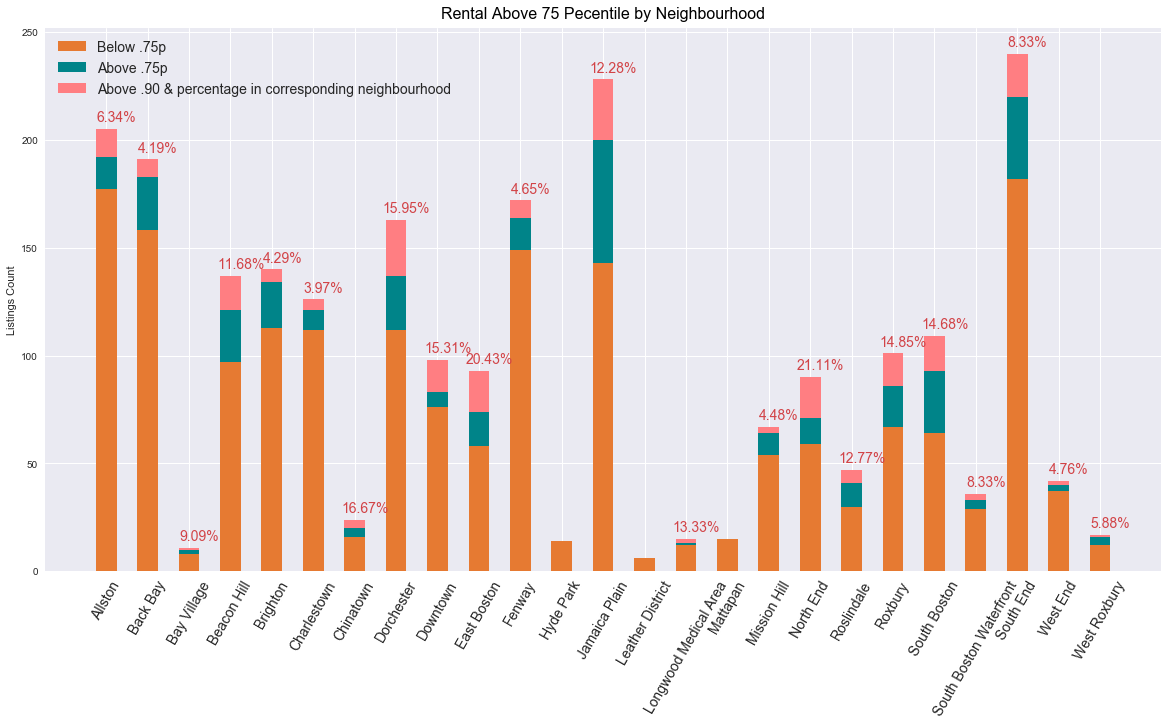

In [11]:
fig, ax = plt.subplots()

title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
axis_font = {'fontname':'Arial', 'size':'14'}
npa = np.arange(0,5000,200)
rects1 = ax.bar(npa, pivot_rental75[0], 100, color='#e67a32')
rects2 = ax.bar(npa, pivot_rental75[1], 100, color='#008489', bottom=pivot_rental75[0])
rects3 = ax.bar(npa, pivot_rental90[1], 100, color='#ff7e82', bottom=pivot_rental75[1]+pivot_rental75[0])
ax.set_ylabel('Listings Count')
plt.grid(True)
ax.set_xticks(npa)
ax.set_xticklabels(pivot_rental75.index,rotation=60, size=14)
ax.set_title('Rental Above 75 Pecentile by Neighbourhood', **title_font)
fig = plt.gcf()
fig.set_size_inches(20, 10)

i=0
for rect in rects1:
    height = rect.get_height() + rects2[i].get_height() + rects3[i].get_height() + 2
    if (height > 0) :
        ax.text(rect.get_x() + rect.get_width(), height, str(round(pivot_pec[1][i]*100,2))+"%",ha='center', va='bottom',  color='#d24347',size = 14)
    i=i+1
ax.legend((rects1[0], rects2[0],rects3[0]),('Below .75p', 'Above .75p', 'Above .90 & percentage in corresponding neighbourhood'), fontsize = 14)
fig.savefig("rental_neig_"+ city + ".png")
plt.show()

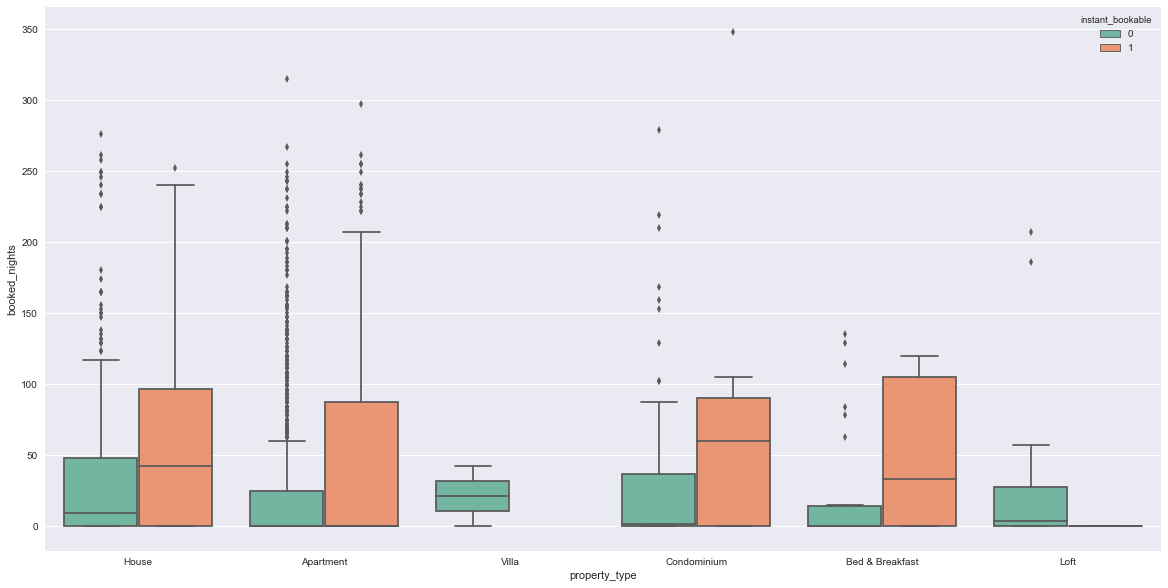

In [12]:
fig, ax = plt.subplots()
sns.plotting_context(font_scale=1.5)
sns.boxplot(x="property_type", y="booked_nights", hue="instant_bookable", data=listings, palette="Set2")
fig.set_size_inches(20, 10)
fig.savefig("rental_property_type_"+ city + ".png")
plt.show()

In [13]:
listings = listings[listings.property_type.isin(['House','Apartment','Loft','Condominium','Villa','Bed & Breakfast'])]
listings.shape

(2394, 75)

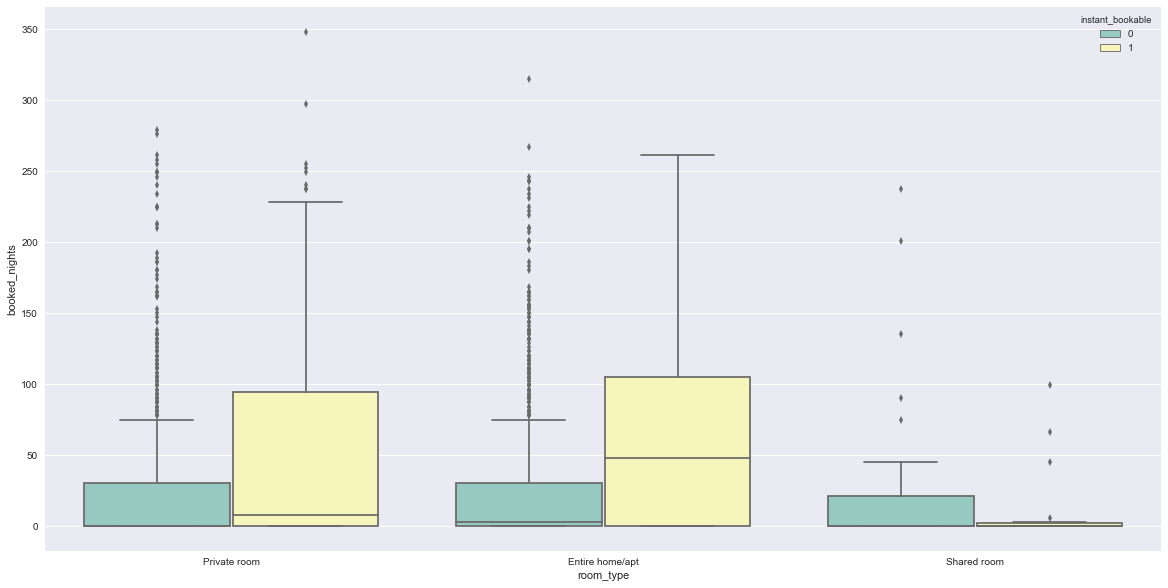

In [14]:
fig, ax = plt.subplots()
sns.boxplot(x="room_type", y="booked_nights", hue="instant_bookable", data=listings, palette="Set3")
fig.set_size_inches(20, 10)
fig.savefig("rental_room_type_"+ city + ".png")
plt.show()

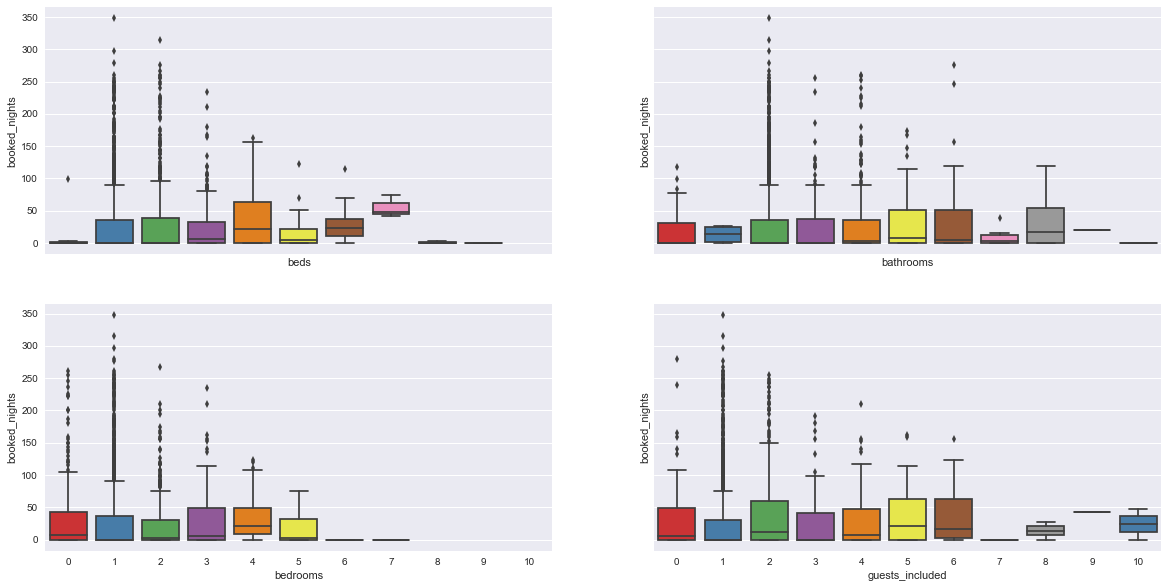

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols=2, sharex=True, sharey=True)
sns.boxplot(ax=axes[0][0], x="beds", y="booked_nights",  data=listings, palette="Set1") #hue="instant_bookable",
sns.boxplot(ax=axes[0][1], x="bathrooms", y="booked_nights", data=listings, palette="Set1")
sns.boxplot(ax=axes[1][0], x="bedrooms", y="booked_nights", data=listings, palette="Set1")
sns.boxplot(ax=axes[1][1], x="guests_included", y="booked_nights", data=listings, palette="Set1")
fig.set_size_inches(20, 10)
fig.savefig("rental_property_number_"+ city + ".png")
plt.show()

In [16]:
sns.set(style="white")

In [17]:
corr = listings[listings.columns[43:65]].corr()

In [18]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

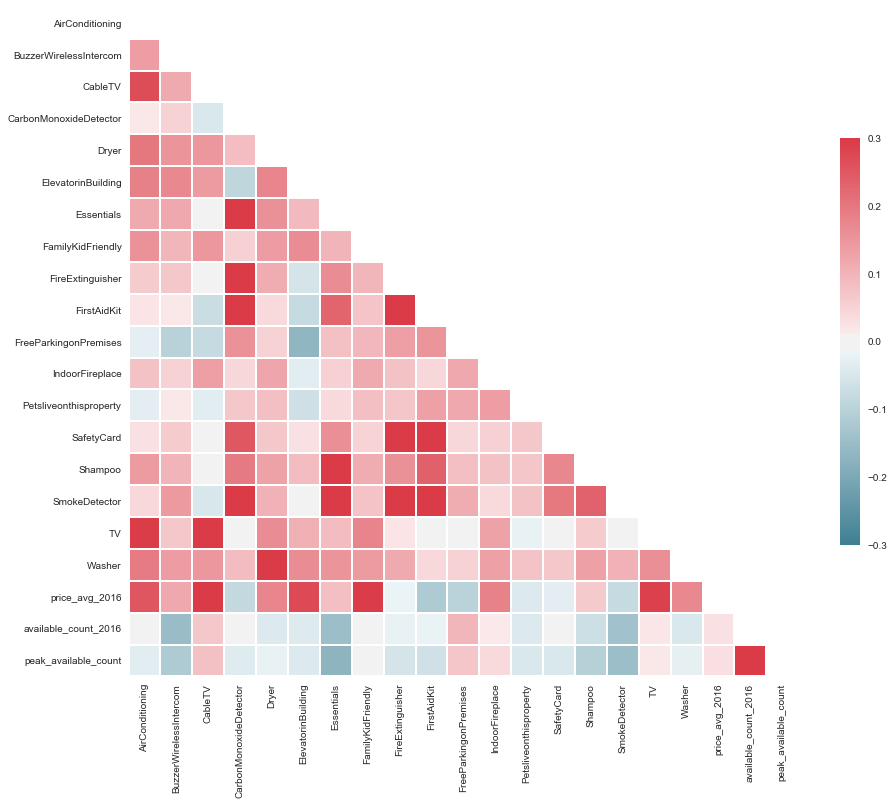

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=1, cbar_kws={"shrink": .5}, ax=ax)
fig.savefig("price_amemties_"+ city + ".png")
plt.show()

In [20]:
listings_no_amen = listings.drop(listings[listings.columns[43:61]], axis=1)

In [21]:
listings.columns.shape

(75,)

In [22]:
corr1 = listings_no_amen[listings_no_amen.columns[1:49]].corr()

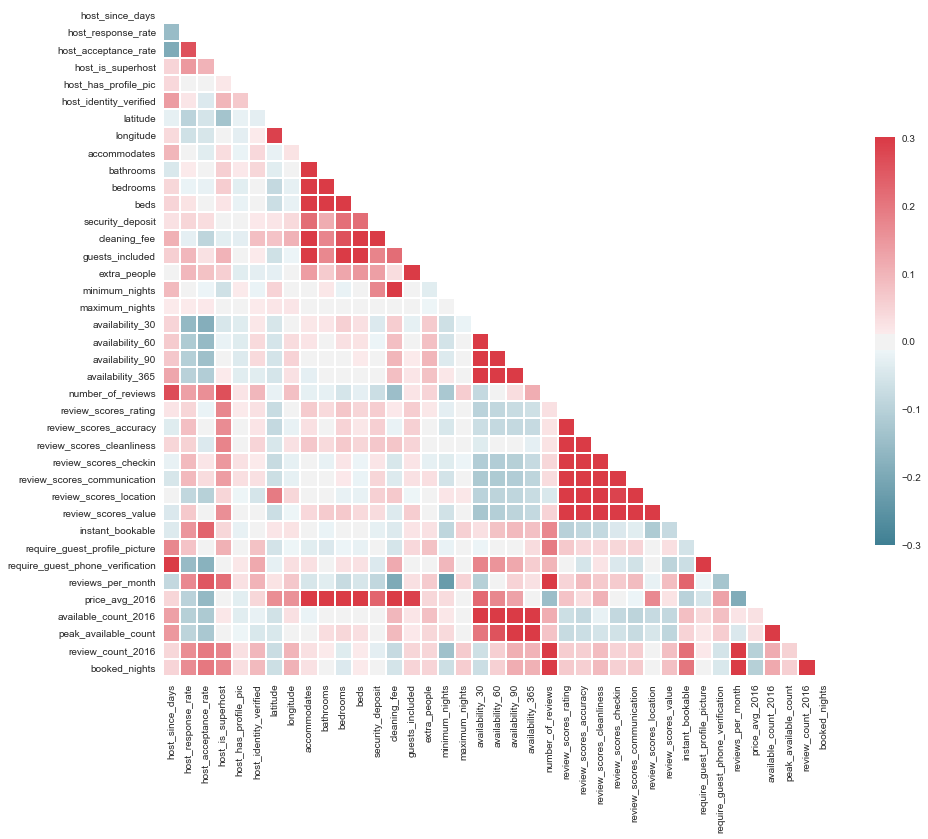

In [23]:
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, 
            mask=mask,
            cmap=cmap, 
            vmax=.3,
            square=True, 
            annot_kws = {'size': 15},
            linewidths=1, 
            cbar_kws={"shrink": .5}, 
            ax=ax)
fig.savefig("others_price_rental"+ city + ".png")
plt.show()

In [24]:
listings_no_amen.to_csv(pwd + '/' + city +'/listings_no_amen_2015.csv', index = False, encoding='utf-8')
listings.to_csv(pwd + '/' + city +'/listings_2015.csv', index = False, encoding='utf-8')

In [25]:
listings_no_amen.columns

Index(['id', 'host_since_days', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'price_avg_2016', 'available_count_2016',
       'avai

## 3. Understand Price

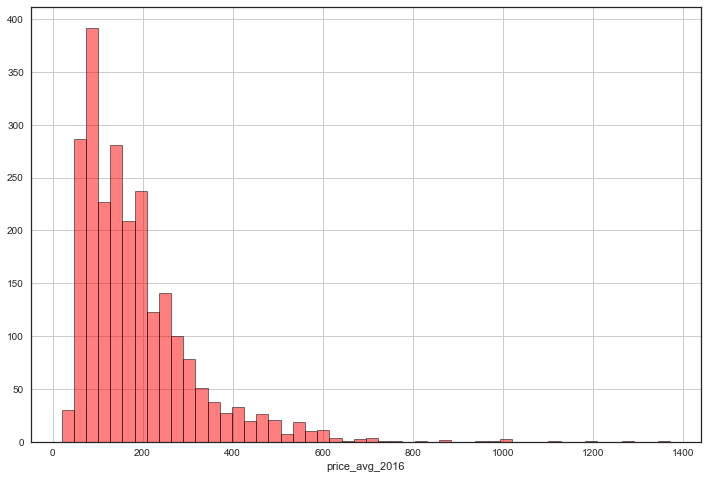

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams["patch.force_edgecolor"] = True
sns.set_context(rc = {'patch.linewidth': 1})
sns.distplot(listings_no_amen["price_avg_2016"], kde = False, color = 'r', hist_kws={'alpha': 0.5})
plt.grid(True)
fig.savefig("price_hist"+ city + ".png")
plt.show()

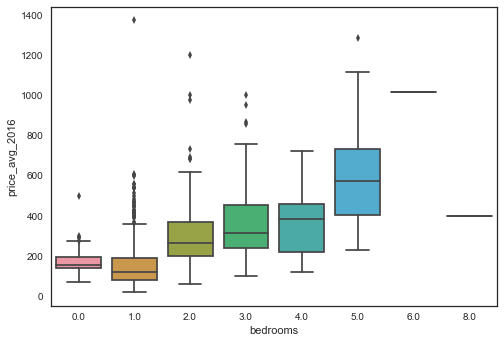

In [27]:
sns.boxplot(x = "bedrooms", y = "price_avg_2016", data = listings_no_amen)
plt.show()

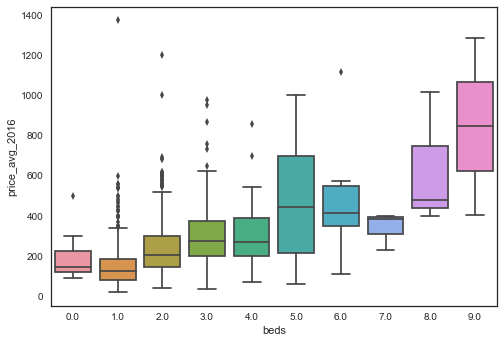

In [28]:
sns.boxplot(x = "beds", y = "price_avg_2016", data = listings_no_amen)
plt.show()

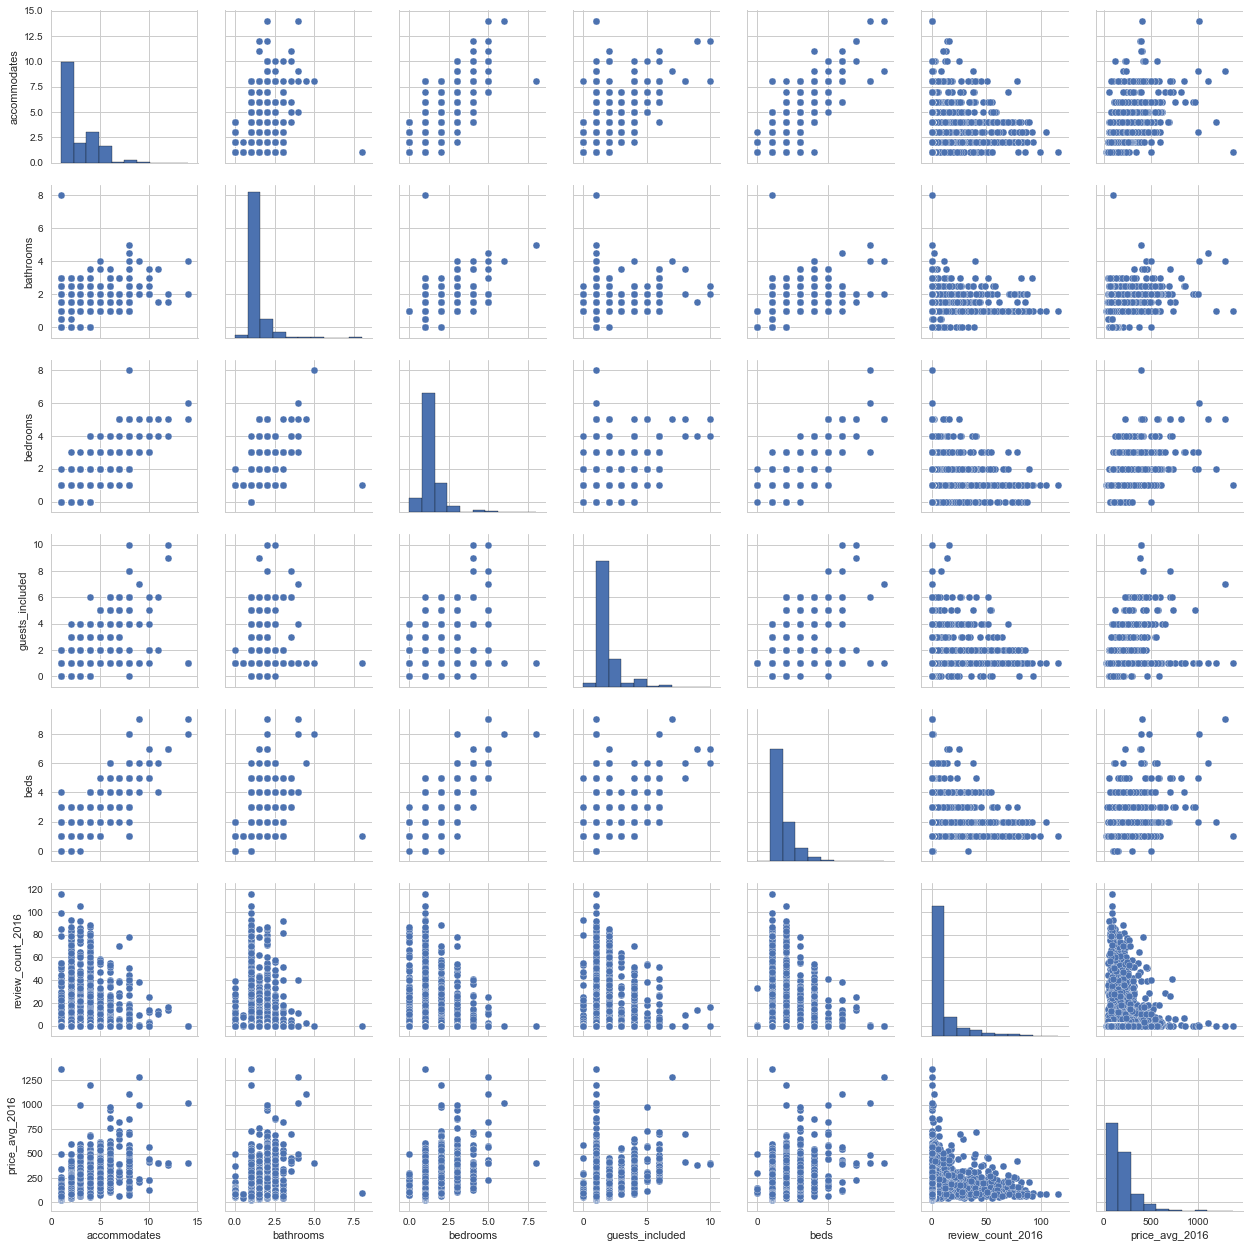

In [29]:
quant_cols = ['accommodates', 'bathrooms', 'bedrooms','guests_included', 'beds', 'review_count_2016',
              'price_avg_2016']
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(listings[quant_cols])
plt.show()

In [30]:
listings_bedrooms_1_3 = listings[listings.bedrooms<4]
listings_bedrooms_1_3 = listings_bedrooms_1_3[listings_bedrooms_1_3>0]
price_bedrooms = listings_bedrooms_1_3.pivot_table(values='price_avg_2016', index='neighbourhood', columns='bedrooms', aggfunc="mean")

In [31]:
price_bedrooms.fillna(0)

bedrooms,1.0,2.0,3.0
neighbourhood,,,
Allston,106.892947,219.261284,306.530446
Back Bay,238.146872,404.992611,588.298256
Bay Village,160.803035,532.689625,0.000000
Beacon Hill,196.936671,279.424897,541.587314
Brighton,101.550109,176.016720,290.894165
Charlestown,116.872131,282.618502,449.665151
Chinatown,217.066970,303.786076,465.235294
Dorchester,86.391994,187.263904,248.265865
Downtown,222.572406,360.573078,368.924138


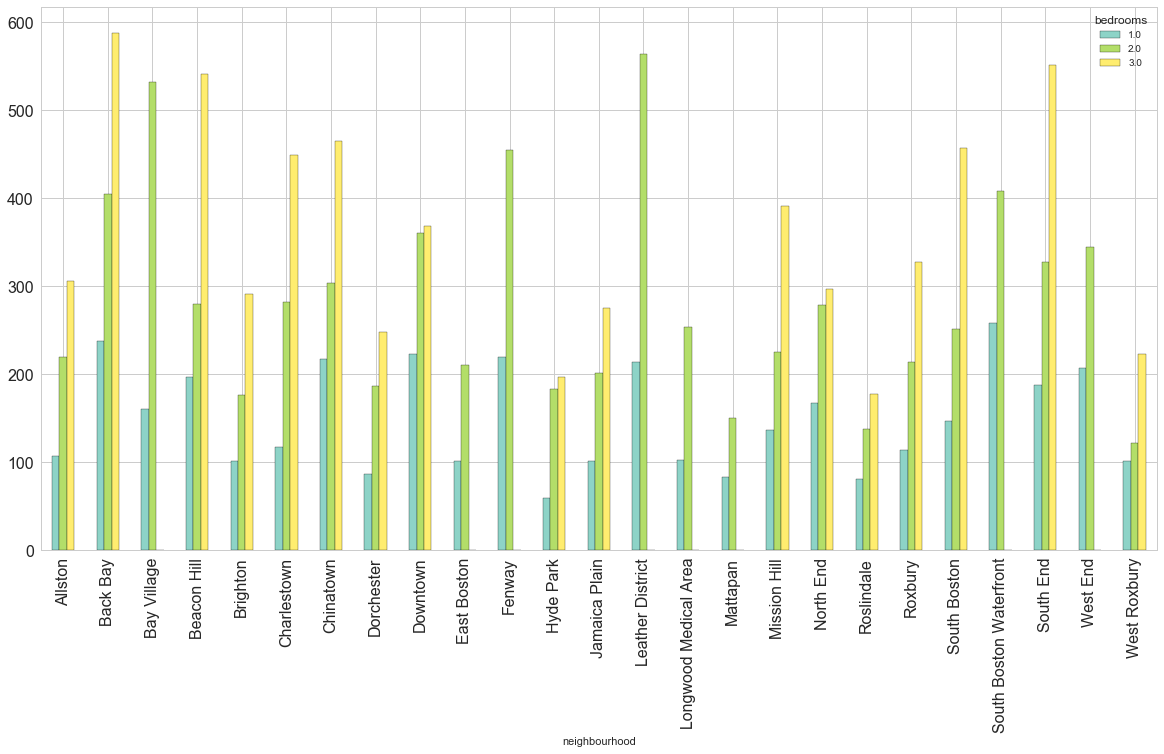

In [32]:
price_bedrooms.plot(kind='bar', colormap='Set3', fontsize = 16)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()